<h1> Machine learning techniques for brain tumor detection </h1>

<h5> 
Members : </br> 
- CORDINA Emmanuel </br> 
- HUILLET Thibault </br> 
- RADJOU Aditya </br> 
</h5>

<h2> I. Let's try Support Vector Machine </h2>

<h3> I.A Determine whether or not the patient has tumor </h3>

<h4>Loading the modules</h4>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.svm import SVC

<h4>Loading the data</h4>

In [13]:
path = './data_tumor/'      
# data_tumor contains two folders 'yes' or 'no'. 
# 'yes' contains MRI images of sick patients
# 'no' contains MRI images of healthy patients

classes = {'no':0,'yes':1}

data=[] #data will contain the images
target=[] #target will contain the class of the images

for c in classes:
    for element in os.listdir(path+c):
        img = cv2.imread(path+c+'/'+element,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(256,256))
        data.append(img)
        target.append(classes[c])

#shuffling the data
shuffle = np.random.permutation(range(len(data)))
data = np.array(data)[shuffle,:]
target = np.array(target)[shuffle]

#splitting the data
data_reshaped = data.reshape(len(data),-1)
xtrain, xtest, ytrain, ytest = train_test_split(data_reshaped,target,test_size=0.80)

#feature scaling
xtrain = xtrain/255
xtest = xtest/255

<h4> Applying SVM model for different values of C </h4>

In [15]:
sv = SVC()              #using RBF kernel with default values
sv.fit(xtrain,ytrain)
print("Train score", sv.score(xtrain,ytrain))
print("Test score", sv.score(xtest,ytest))

Train score 0.9570552147239264
Test score 0.8744257274119449


Train score for C=1: 0.9570552147239264
Test score for C=1: 0.8744257274119449
Train score for C=10: 1.0
Test score for C=10: 0.9035222052067381
Train score for C=100: 1.0
Test score for C=100: 0.9042879019908117
Train score for C=1000: 1.0
Test score for C=1000: 0.9042879019908117
Train score for C=10000: 1.0
Test score for C=10000: 0.9042879019908117


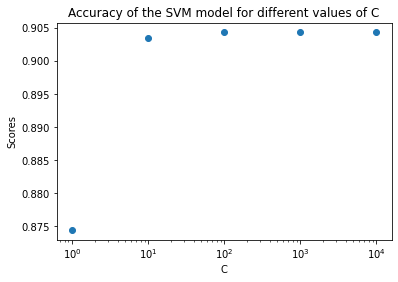

In [16]:
C = [1,10,100,1000,10000]
Scores = []

for l in C:
    sv = SVC(C=l)              #using RBF kernel
    sv.fit(xtrain,ytrain)
    train_score = sv.score(xtrain,ytrain)
    test_score = sv.score(xtest,ytest)
    Scores.append(test_score)
    print("Train score for C="+str(l)+":", train_score)
    print("Test score for C="+str(l)+":", test_score)

plt.scatter(C,Scores)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Scores")
plt.title("Accuracy of the SVM model for different values of C")
plt.show()

The accuracy does not increase significantly when C is greater than 10. So let C=10

<h4> Applying SVM model for different values of gamma </h4>

Train score for G=1e-06 0.8404907975460123
Test score for G=1e-06 0.8483920367534457
Train score for G=1e-05 0.8880368098159509
Test score for G=1e-05 0.8560490045941807
Train score for G=0.0001 0.99079754601227
Test score for G=0.0001 0.8878254211332313
Train score for G=0.001 1.0
Test score for G=0.001 0.8947166921898928
Train score for G=0.01 1.0
Test score for G=0.01 0.8843797856049005
Train score for G=0.00039948914415089966 1.0
Test score for G=0.00039948914415089966 0.9035222052067381


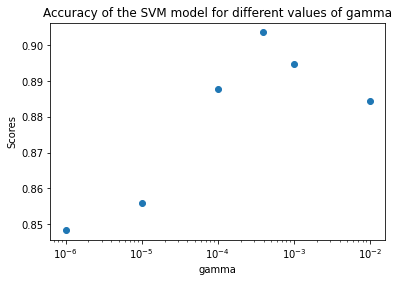

In [17]:
default_gamma = 1/(256*256*xtrain.var())

G = [0.000001,0.00001,0.0001,0.001,0.01,default_gamma]
Scores = []
for g in G:
    sv = SVC(C=10,gamma=g)              #using RBF kernel
    sv.fit(xtrain,ytrain)
    train_score = sv.score(xtrain,ytrain)
    test_score = sv.score(xtest,ytest)
    Scores.append(test_score)
    print("Train score for G="+str(g), train_score)
    print("Test score for G="+str(g), test_score)

plt.scatter(G,Scores)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Scores")
plt.title("Accuracy of the SVM model for different values of gamma")
plt.show()

The default value of gamma was better: let's keep it. 

<h4> Make sure that there is the same number of positive and negative results </h4>

In [18]:
path = './data_tumor/'
classes = {'no':0,'yes':1}

data=[] #data will contain the images
target=[] #target will contain the class of the images

data_tumor=[]
data_no_tumor=[]
target_tumor=[]
target_no_tumor=[]

for c in classes:
    for element in os.listdir(path+c):
        img = cv2.imread(path+c+'/'+element,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(200,200))
        if c=='no':
            data_no_tumor.append(img)
            target_no_tumor.append(classes[c])
        else:
            data_tumor.append(img)
            target_tumor.append(classes[c])

#shuffling the datasets
shuffle = np.random.permutation(range(len(data_no_tumor)))
data_no_tumor = np.array(data_no_tumor)[shuffle,:]
target_no_tumor = np.array(target_no_tumor)[shuffle]

shuffle = np.random.permutation(range(len(data_tumor)))
data_tumor = np.array(data_tumor)[shuffle,:]
target_tumor = np.array(target_tumor)[shuffle]


#slicing in order to have the same number of samples for each case
min_length = min(len(data_tumor),len(data_no_tumor))
N_train = int(0.8*min_length)

train_data = np.concatenate((data_tumor[:N_train], data_no_tumor[:N_train]))
train_target = np.concatenate((target_tumor[:N_train],target_no_tumor[:N_train]))

test_data = np.concatenate((data_tumor[N_train:min_length],data_no_tumor[N_train:min_length]))
test_target = np.concatenate((target_tumor[N_train:min_length], target_no_tumor[N_train:min_length]))

#Reshaping data (to apply svm)
train_reshaped = train_data.reshape(len(train_data),-1)
test_reshaped = test_data.reshape(len(test_data),-1)

#feature scaling
xtrain = train_reshaped/255
xtest = test_reshaped/255


ytrain=train_target
ytest=test_target

In [19]:
sv = SVC(C=10)              #using RBF kernel
sv.fit(xtrain,ytrain)
print("Training score", sv.score(xtrain,ytrain))
print("Testing score", sv.score(xtest,ytest))               

Training score 1.0
Testing score 0.92


When we use the same number of positive and negative cases for training, we obtain a better accuracy (0.92>0.90)

<h3> I.B Determine the different types of tumor </h3>

In [20]:
path = './data_tumor_types/'
# data_tumor_types contains two folders 'yes' and 'no', like data_tumor.
# The difference is that, is the folder 'yes', there are 3 folders, corresponding to different types of tumor. 

classes = {'no':0,'glioma':1,'meningioma':2,'pituitary':3}

data_no_tumor = []
data_glioma = []
data_meningioma = []
data_pituitary = []

target_no_tumor = []
target_glioma = []
target_meningioma = []
target_pituitary = []

for c in classes:
    if c=='no':
        for element in os.listdir(path+c):
            img = cv2.imread(path+c+'/'+element,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(200,200))
            data_no_tumor.append(img)
            target_no_tumor.append(classes[c])
    else:
        for element in os.listdir(path+'yes/'+c):
            img = cv2.imread(path+'yes/'+c+'/'+element,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(200,200))
            if c=="glioma":
                data_glioma.append(img)
                target_glioma.append(classes[c])
            if c=="meningioma":
                data_meningioma.append(img)
                target_meningioma.append(classes[c])
            if c=="pituitary":
                data_pituitary.append(img)
                target_pituitary.append(classes[c])


#shuffling the datasets
shuffle = np.random.permutation(range(len(data_no_tumor)))
data_no_tumor = np.array(data_no_tumor)[shuffle,:]

shuffle = np.random.permutation(range(len(data_glioma)))
data_glioma = np.array(data_glioma)[shuffle,:]

shuffle = np.random.permutation(range(len(data_meningioma)))
data_meningioma = np.array(data_meningioma)[shuffle,:]

shuffle = np.random.permutation(range(len(data_pituitary)))
data_pituitary = np.array(data_pituitary)[shuffle,:]

#slicing in order to have the same number of samples for each case
min_length = min(len(data_no_tumor),len(data_glioma),len(data_meningioma),len(data_pituitary))
N_train = int(0.8*min_length)

train_data = np.concatenate((data_no_tumor[:N_train], data_glioma[:N_train], data_meningioma[:N_train], data_pituitary[:N_train]))
train_target = np.concatenate((target_no_tumor[:N_train], target_glioma[:N_train], target_meningioma[:N_train], target_pituitary[:N_train]))

test_data = np.concatenate((data_no_tumor[N_train:min_length], data_glioma[N_train:min_length], data_meningioma[N_train:min_length], data_pituitary[N_train:min_length]))
test_target = np.concatenate((target_no_tumor[N_train:min_length], target_glioma[N_train:min_length], target_meningioma[N_train:min_length], target_pituitary[N_train:min_length]))

#Reshaping data (to apply svm)
train_reshaped = train_data.reshape(len(train_data),-1)
test_reshaped = test_data.reshape(len(test_data),-1)

#feature scaling
xtrain = train_reshaped/255
xtest = test_reshaped/255


ytrain=train_target
ytest=test_target 

Train score for C=1: 0.92375
Test score for C=1: 0.81
Train score for C=10: 1.0
Test score for C=10: 0.855
Train score for C=100: 1.0
Test score for C=100: 0.855
Train score for C=1000: 1.0
Test score for C=1000: 0.855
Train score for C=10000: 1.0
Test score for C=10000: 0.855


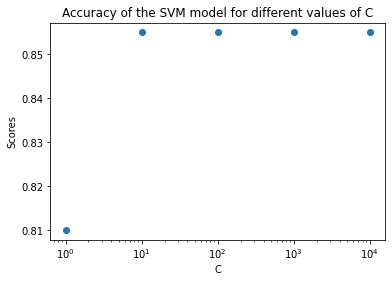

In [21]:
C = [1,10,100,1000,10000]
Scores = []
for l in C:
    sv = SVC(C=l)              #using RBF kernel
    sv.fit(xtrain,ytrain)
    train_score = sv.score(xtrain,ytrain)
    test_score = sv.score(xtest,ytest)
    Scores.append(test_score)
    print("Train score for C="+str(l)+":", train_score)
    print("Test score for C="+str(l)+":", test_score)

plt.scatter(C,Scores)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Scores")
plt.title("Accuracy of the SVM model for different values of C")
plt.show()

Here again, C=10 is fine to meet the best accuracy. However, the accuracy has decreased compared to the first case (when we just determined whether the patient is sick or not). 

Train score for G=1e-06 0.519375
Test score for G=1e-06 0.5125
Train score for G=1e-05 0.720625
Test score for G=1e-05 0.66
Train score for G=0.0001 0.950625
Test score for G=0.0001 0.82
Train score for G=0.001 1.0
Test score for G=0.001 0.8675
Train score for G=0.01 1.0
Test score for G=0.01 0.7625
Train score for G=0.0003755200123384092 0.999375
Test score for G=0.0003755200123384092 0.8575


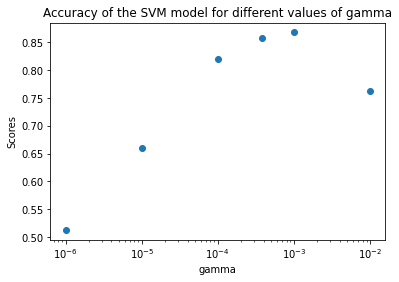

In [22]:
default_gamma = 1/(256*256*xtrain.var())

G = [0.000001,0.00001,0.0001,0.001,0.01,default_gamma]
Scores = []
for g in G:
    sv = SVC(C=10,gamma=g)              #using RBF kernel
    sv.fit(xtrain,ytrain)
    train_score = sv.score(xtrain,ytrain)
    test_score = sv.score(xtest,ytest)
    Scores.append(test_score)
    print("Train score for G="+str(g), train_score)
    print("Test score for G="+str(g), test_score)

plt.scatter(G,Scores)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Scores")
plt.title("Accuracy of the SVM model for different values of gamma")
plt.show()

Here, the best value for gamma is 0.001 (which is not the default value!). The accuracy have also decreased compared to the first case. 